# Optim Bottom-Up

## Setup


In [ ]:
%load_ext autoreload
%autoreload 2
from importlib import reload
import logging
reload(logging)

import torch
import matplotlib.pyplot as plt
from pprint import pprint

import tensorcraft as tc
log = logging.getLogger("tensorcraft")

19-02-2025 03:34:06 : INFO : compiler : __init__ -- Grammar file loaded successfully.
19-02-2025 03:34:06 : INFO : compiler : __init__ -- Parser object created successfully.


## Redistributors

Given a tensor shape, a starting distribution and a target distribution, creates a sequence of collective ops to reach the target dist while optimizing for different metrics.

### Naive Gather Split

Simplest redistributor. Just allgathers, then splits. Should be both communication and memory ineficient. 

In [ ]:
naive_rdist = tc.optim.NaiveGathererRedist(tc.optim.IdealLowerBoundsCM())

MultiAxisDist(torch.Size([2, 4]), ((0,), ()), (10, 10))


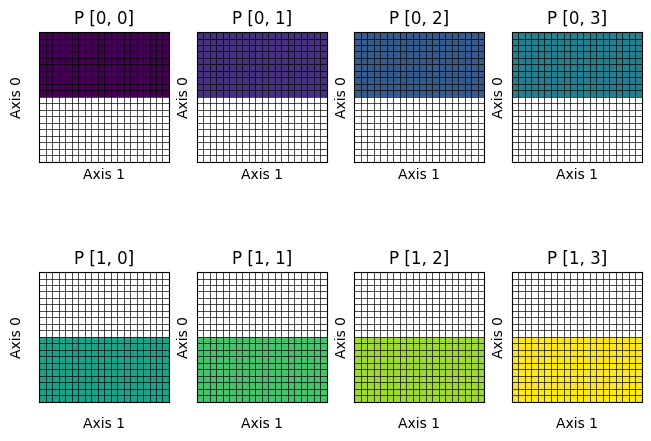

In [ ]:
tensor_shape = torch.Size((20,20))
mesh = torch.Size((2,4))
dist = tc.dist.MultiAxisDist(mesh, ((0,), ()), (10, 10))
print(dist)
fig = plt.figure(layout='constrained')
tc.viz.draw_processor_grid(fig, tensor_shape, dist)


In [ ]:
target_dist = tc.dist.MultiAxisDist(mesh, ((), (0,)), (10, 10))
sequence, cost = naive_rdist.redistribute(tensor_shape, dist, target_dist)
pprint(sequence)
print(cost)

19-02-2025 03:40:18 : INFO : naive_gatherer : redistribute -- Dist MultiAxisDist(torch.Size([2, 4]), ((), ()), (0, 0)), volume: 200.0, n_procs 2
[('allgather',
  (torch.Size([20, 20]),),
  Cost(latency=1, bandwidth=200.0, computation=0, max_memory_delta=200.0)),
 ('split',
  (torch.Size([20, 20]),),
  Cost(latency=0, bandwidth=0, computation=0, max_memory_delta=-200.0))]
Cost(latency=1, bandwidth=200.0, computation=0, max_memory_delta=200.0)
